In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import pyodbc as odbc

In [3]:
cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [4]:
#Importing the dataset, read straight from SQL
dataset=pd.read_sql_query('SELECT * FROM diamonds_shuf69sclnzparm_50k', cnxn)
dataset.head(10)

,depth_scaled,table_scaled,cut_scaled,color_scaled,clarity_scaled,carat_scaled,price_USD,index_org
0,0.733344,-0.204605,0.981473,0.937163,-0.638095,-0.291008,1901.0,47803.0
1,0.105120,-0.652139,0.981473,1.525021,1.183265,0.552862,13588.0,25068.0
2,0.942753,0.242928,-1.705279,0.937163,0.576145,-0.122234,2824.0,518.0
3,1.570978,-1.994739,-1.705279,-1.414272,0.576145,0.426281,3763.0,5135.0
4,-0.523105,1.137995,0.085889,-0.826413,-0.638095,1.481118,9820.0,21753.0
5,0.384331,1.137995,-0.809695,-0.826413,-1.245215,1.227957,6369.0,15929.0
6,-0.872119,-0.652139,0.981473,0.937163,-0.030975,-1.029394,872.0,34634.0
7,-1.919161,0.242928,-1.705279,1.525021,-1.245215,0.257507,3936.0,5914.0
8,-0.383500,0.690462,-0.809695,-0.238555,1.790385,-1.008297,876.0,34730.0
9,-0.174092,1.585529,-1.705279,1.525021,-1.245215,1.502215,8742.0,20344.0


In [6]:
#Defining X and y
X=dataset.iloc[:,0:6].values
y=dataset.iloc[:,-2].values

In [7]:
X

array([[ 0.73334442, -0.20460509,  0.98147332,  0.93716275, -0.63809506,
        -0.29100792],
       [ 0.10511955, -0.65213854,  0.98147332,  1.52502147,  1.18326497,
         0.55286174],
       [ 0.94275271,  0.24292836, -1.70527938,  0.93716275,  0.57614496,
        -0.12223399],
       ...,
       [ 0.73334442, -1.09967199, -0.80969515, -0.23855468,  1.79038498,
        -1.05049061],
       [ 3.38584943,  0.24292836, -2.60086361,  0.34930404, -1.24521508,
         0.46847477],
       [ 0.10511955, -0.20460509,  0.98147332, -0.23855468,  1.79038498,
        -0.48087859]])

In [8]:
y

array([ 1901., 13588.,  2824., ...,   635.,  3633.,  2217.])

In [9]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
#Training the model - for initial training use defult parameters
import time
start = time.time()

from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(random_state=0,n_estimators=100, criterion='mae')
regressor.fit(X_train,y_train)

train_time = time.time() - start

In [11]:
train_time

669.7215685844421

In [12]:
import time
start = time.time()
y_pred=regressor.predict(X_test)
y_pred10k_time = time.time() - start
y_pred

array([2807.725,  767.345, 1933.64 , ...,  891.83 , 4603.37 ,  792.375])

In [13]:
y_test

array([2927.,  610., 2220., ...,  899., 4588.,  825.])

In [14]:
from sklearn import metrics
print("Mean squared error",metrics.mean_squared_error(y_test,y_pred))
print("Mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print("R2_Score:",metrics.r2_score(y_test,y_pred))

Mean squared error 279368.4830921625
Mean absolute error 274.1696255
R2_Score: 0.9820727399034601


In [15]:
y_pred10k_time

0.21920204162597656

In [16]:
regressor.score(X_train, y_train)

0.9969319304517621

In [17]:
regressor.score(X_test, y_test)

0.9820727399034601

In [18]:
trained_records = []
trained_records.append({
    'model': 'RandomForestRegressor(MAE)',
    'train_time': train_time,
    'test_time': y_pred10k_time,
    'train_r2': regressor.score(X_train, y_train),
    'test_r2': regressor.score(X_test, y_test),
    'test_MSE': metrics.mean_squared_error(y_test,y_pred),
    'test_MAE': metrics.mean_absolute_error(y_test,y_pred)})
trained_records

[{'model': 'RandomForestRegressor(MAE)',
  'train_time': 669.7215685844421,
  'test_time': 0.21920204162597656,
  'train_r2': 0.9969319304517621,
  'test_r2': 0.9820727399034601,
  'test_MSE': 279368.4830921625,
  'test_MAE': 274.1696255}]

In [19]:
trained_records = pd.DataFrame(trained_records,columns=['model','train_time','test_time','train_r2','test_r2','test_MSE','test_MAE'])
trained_records

,model,train_time,test_time,train_r2,test_r2,test_MSE,test_MAE
0,RandomForestRegressor(MAE),669.721569,0.219202,0.996932,0.982073,279368.483092,274.169625


In [20]:
import sys
import pyodbc as odbc
cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [21]:
#Model must be in text format.

cursor = cnxn.cursor()
trained_insert = '''INSERT INTO ML_Parameter_Score_05oct (Model,Training_Time_40k_rows,Test_Time_10k_rows,Train_r2_score,Test_r2_score,Test_MSE,Test_MAE)
               VALUES (?,?,?,?,?,?,?)
'''
for rec in trained_records.iterrows():
    values = (
        rec[1]['model'],
        rec[1]['train_time'],
        rec[1]['test_time'],
        rec[1]['train_r2'],
        rec[1]['test_r2'],
        rec[1]['test_MSE'],
        rec[1]['test_MAE']
    )
cursor.execute(trained_insert, values)
cnxn.commit()
cursor.close()
print("Input Parameter_Score Done!")

Input Parameter_Score Done!


In [22]:
Comparison=pd.DataFrame({"Actual:":y_test,"Predicted:":y_pred})
print(Comparison.to_string())

      Actual:  Predicted:
0      2927.0    2807.725
1       610.0     767.345
2      2220.0    1933.640
3      5147.0    5657.865
4     17227.0   17335.965
5      4739.0    5479.510
6      1024.0    1043.780
7      5798.0    4235.155
8      6350.0    6379.850
9       556.0     521.215
10      880.0     732.220
11     1404.0    1619.230
12      577.0     429.250
13      505.0     488.630
14      844.0     775.700
15      789.0     792.350
16      854.0     986.525
17     2123.0    2161.765
18     5488.0    5597.460
19     2964.0    2721.570
20      743.0     665.180
21      789.0     805.730
22     6028.0    6023.430
23     1013.0     793.190
24     1125.0    1284.860
25     2397.0    2337.770
26      803.0     757.165
27     2348.0    2204.155
28      753.0     830.780
29     2343.0    2489.860
30     2096.0    2216.220
31      572.0     600.640
32     5816.0    5830.465
33     4257.0    4266.400
34    16294.0   15161.720
35     3908.0    3388.150
36     2210.0    2354.050
37      914.

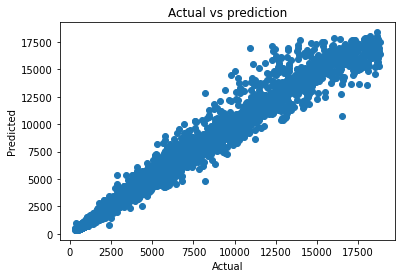

In [23]:
#Visualize
plt.scatter(y_test,y_pred)
plt.title("Actual vs prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [24]:
#Importing the dataset SET ASIDE FOR INPUT TO PREDICT, read straight from SQL
input_data=pd.read_sql_query('SELECT * FROM diamonds_shuf69sclnzparm_tail_3940', cnxn)
input_data.head(10)

,depth_scaled,table_scaled,cut_scaled,color_scaled,clarity_scaled,carat_scaled,price_USD,index_org
0,-0.243894,-0.652139,0.981473,-1.414272,2.397505,-0.987200,694.0,29200.0
1,-0.034486,-0.652139,0.981473,1.525021,1.183265,-0.607459,2718.0,53703.0
2,-0.941922,1.585529,0.085889,-0.238555,-1.245215,2.535955,17136.0,27011.0
3,-0.523105,-0.204605,0.981473,0.937163,-0.030975,-0.565266,1727.0,46017.0
4,0.454133,0.242928,-0.809695,-1.414272,-0.638095,-1.008297,388.0,41584.0
5,0.523936,-0.652139,0.981473,0.937163,-0.030975,-0.523072,2030.0,48842.0
6,-0.872119,-0.652139,0.981473,1.525021,-0.030975,-1.008297,758.0,31322.0
7,0.733344,-1.994739,0.981473,-0.238555,1.790385,-1.029394,1046.0,38798.0
8,-1.779555,1.137995,-0.809695,0.349304,-0.638095,-0.206621,2453.0,52058.0
9,-1.570147,1.137995,0.085889,0.349304,-0.030975,-1.008297,773.0,31770.0


In [25]:
#Defining X and y FROM INPUT
inp_X=input_data.iloc[:,0:6].values
inp_y=input_data.iloc[:,-2].values

In [26]:
inp_X

array([[-0.24389427, -0.65213854,  0.98147332, -1.41427211,  2.397505  ,
        -0.98720039],
       [-0.03448598, -0.65213854,  0.98147332,  1.52502147,  1.18326497,
        -0.60745904],
       [-0.94192191,  1.58552871,  0.08588908, -0.23855468, -1.24521508,
         2.53595544],
       ...,
       [ 2.12939968, -0.65213854, -2.60086361, -0.23855468,  1.18326497,
         1.48111837],
       [-2.05876612,  0.69046181,  0.08588908,  1.52502147, -1.24521508,
         0.44737803],
       [ 0.24472507, -0.65213854,  0.98147332, -2.00213083, -1.24521508,
         0.42628129]])

In [27]:
inp_y

array([  694.,  2718., 17136., ..., 13553.,  4672.,  3528.])

In [28]:
inpy_pred=regressor.predict(inp_X)
inpy_pred

array([  841.65 ,  2640.82 , 12453.215, ..., 13670.65 ,  3829.01 ,
        3396.2  ])

In [29]:
print("Mean squared error",metrics.mean_squared_error(inp_y,inpy_pred))
print("Mean absolute error",metrics.mean_absolute_error(inp_y,inpy_pred))
print("R2_Score:",metrics.r2_score(inp_y,inpy_pred))

Mean squared error 365037.0532120685
Mean absolute error 307.2314923857868
R2_Score: 0.9788556962676241


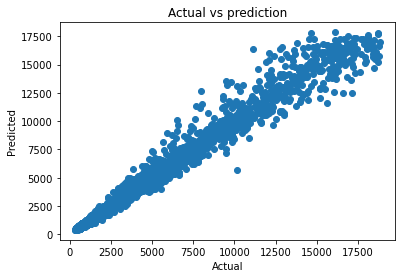

In [30]:
#Visualize
plt.scatter(inp_y,inpy_pred)
plt.title("Actual vs prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [31]:
Comparison=pd.DataFrame({"Actual:":inp_y,"Predicted:":inpy_pred})
print(Comparison.to_string()) 

      Actual:  Predicted:
0       694.0     841.650
1      2718.0    2640.820
2     17136.0   12453.215
3      1727.0    1684.550
4       388.0     436.220
5      2030.0    1723.940
6       758.0     914.360
7      1046.0     900.375
8      2453.0    2455.450
9       773.0     643.155
10     1289.0    1315.430
11    13908.0   13720.015
12      689.0     629.955
13      814.0     814.840
14     2646.0    2558.500
15    12291.0   10893.400
16     4963.0    4930.325
17     1122.0    1239.085
18     5350.0    5057.460
19      770.0     903.220
20     7764.0    7956.235
21     1219.0    1308.620
22     1662.0    1753.720
23      593.0     524.160
24     1061.0     964.305
25     2264.0    2294.830
26      827.0     993.540
27     4821.0    3771.025
28    18741.0   15791.535
29     8055.0    7728.075
30     5846.0    5556.830
31     4315.0    4391.370
32     1046.0     977.200
33    11365.0   11013.720
34      696.0     737.760
35    18371.0   15628.180
36     2990.0    3106.890
37     5273.

In [32]:
import time
start = time.time()
inpy_pred=regressor.predict(inp_X)
inpy_pred3940_time = time.time() - start
inpy_pred

array([  841.65 ,  2640.82 , 12453.215, ..., 13670.65 ,  3829.01 ,
        3396.2  ])

In [33]:
regressor.score(inp_X, inp_y)

0.9788556962676241

In [34]:
inpy_pred3940_time

0.10262084007263184

In [35]:
prediction_records = []
prediction_records.append({
    'model': 'RandomForestRegressor(MAE)',
    'prediction_time': inpy_pred3940_time,
    'r2': regressor.score(inp_X, inp_y),
    'MSE': metrics.mean_squared_error(inp_y,inpy_pred),
    'MAE': metrics.mean_absolute_error(inp_y,inpy_pred)})
prediction_records

[{'model': 'RandomForestRegressor(MAE)',
  'prediction_time': 0.10262084007263184,
  'r2': 0.9788556962676241,
  'MSE': 365037.0532120685,
  'MAE': 307.2314923857868}]

In [36]:
prediction_records = pd.DataFrame(prediction_records,columns=['model','prediction_time','r2','MSE','MAE'])
prediction_records

,model,prediction_time,r2,MSE,MAE
0,RandomForestRegressor(MAE),0.102621,0.978856,365037.053212,307.231492


In [37]:
cursor = cnxn.cursor()
prediction_insert = '''INSERT INTO ML_Predictions_Score_05oct (Model,Prediction_Time_3940_rows,Prediction_r2,Prediction_MSE,Prediction_MAE)
               VALUES (?,?,?,?,?)
'''
for rec in prediction_records.iterrows():
    values = (
        rec[1]['model'],
        rec[1]['prediction_time'],
        rec[1]['r2'],
        rec[1]['MSE'],
        rec[1]['MAE']
    )
cursor.execute(prediction_insert, values)
cnxn.commit()
cursor.close()
print("Input Parameter_Score Done!")

Input Parameter_Score Done!
